---

# Gradient Descent - Logistic Regression

---

## Introduction

Gradient Descent logistic regression is a classification algorithm that is used to predict the probability of a categorical dependent variable. By adding a sigmoid function to the linear regression model, we can transform the output of the linear regression model into a probability value between 0 and 1. Then we can use this probability value to predict the class of the input sample.

---

## Algorithm

Gradient Descent logistic regression is add a sigmoid function to the linear regression model. The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-y}}
$$

Where $z$ is the linear combination of the input features and the model parameters:

$$
y = w_1x_1 + w_2x_2 + ... + w_nx_n + b
$$

The sigmoid function transforms the output of the linear regression model into a probability value between 0 and 1. The probability value can be interpreted as the likelihood of the input sample belonging to the positive class. The probability of the input sample belonging to the negative class is simply $1 - p$, where $p$ is the probability of the input sample belonging to the positive class.


### Hypothesis Function

The hypothesis function for logistic regression is given by:

$$
h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
$$

Where:
- $h_\theta(x)$ is the predicted output
- $x$ is the input feature vector
- $\theta$ is the parameter vector

### The Binary Cross Entropy Loss Function 

We want to classify binary output which are 0 or 1. Moreover, we are wishing to predict that *probability of each of these labels given a single feature measurement*. Thus, we encounter the conditional probability function:

$$
P\Big(y^{(i)}\mid x^{(i)}\Big)=\begin{cases}
          \hat{y}^{(i)}, \quad &  y^{(i)} = 1 \\
          1-\hat{y}^{(i)}, \quad & y^{(i)} = 0 \\
     \end{cases}
$$

Notice that this conditional probability depends on the value of $\hat{y}^{(i)}$, which in-turn depends on the values of our weight and bias. Moreover, we wish to *maximize* this probability over all training examples since this quantity is largest when our predicted probabilities are close approximations to the true 0-1 labels. Thus, we seek to solve the following maximization problem:

$$
\max_{\mathbf{w}, b} \sum_{i=1}^{N}P\Big(y^{(i)}\mid x^{(i)}\Big).
$$

Before considering this optimization problem, we next recall the famous Bernoulli formula for binary probabilities:
$$
P\Big(y^{(i)}\mid x^{(i)}\Big) = [\hat{y}^{(i)}]^{y}[1 - \hat{y}^{(i)}]^{(1-y)}
$$

Taking the logorithm on both sides of this equation yields (dropping the index notation to avoid messy equations):
$$
\begin{align} 
\log P\Big(y^{(i)}\mid x^{(i)}\Big)&= \log \hat{y}^{y}(1 - \hat{y})^{(1-y)}\\ 
&= y\log \hat{y} + (1-y) \log (1 - \hat{y})\\ 
\end{align}
$$

Since the logorithmic function is an *increasing function*, maximimizing $P\Big(y^{(i)}\mid x^{(i)}\Big)$ is equivalent to maximizing $\log P\Big(y^{(i)}\mid x^{(i)}\Big)$. Equivalently, we could also considering minimizing this function. Thus, we arrive at our single neuron coss/loss function for a single entry of data, which implies a full loss function. 


To train the logistic regression model, we then have the cross-entropy loss as the cost function:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)}\log{h_\theta(x^{(i)})} + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))]
$$

Where:
- $J(\theta)$ is the cost
- $m$ is the number of samples
- $y^{(i)}$ is the true label for the $i$-th sample
- $h_\theta(x^{(i)})$ is the predicted label for the $i$-th sample

### Gradient Descent

The gradient descent algorithm is used to minimize the cost function by updating the parameters iteratively. The update rule for logistic regression is:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:
- $\theta_j$ is the $j$-th parameter
- $\alpha$ is the learning rate
- $\frac{\partial J(\theta)}{\partial \theta_j}$ is the partial derivative of the cost function with respect to the $j$-th parameter

### Derivative of the Cost Function

To perform gradient descent, we need to compute the derivative of the cost function with respect to each parameter. The derivative is given by:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$

By plugging the derivative back into the gradient descent update rule, we get the final update equation for logistic regression:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$

---

## Implementation



In [40]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (cross-entropy loss)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta.reshape(-1, 1))  # Ensure the correct dimensions
    cost = -(1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost


# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        h = sigmoid(X @ theta.reshape(-1, 1))  # Ensure the correct dimensions
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient.reshape(-1)  # Reshape the gradient to match theta's shape
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

# Feature scaling (normalization)
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled


# Logistic regression (modified to return the cost history)
def logistic_regression(X, y, alpha=0.01, num_iterations=1000):
    m, n = X.shape
    X_scaled = feature_scaling(X)
    X_with_bias = np.hstack([np.ones((m, 1)), X_scaled])
    theta = np.zeros(n + 1)
    theta, cost_history = gradient_descent(X_with_bias, y, theta, alpha, num_iterations)  # Get the cost history as well
    return theta, cost_history


# Prediction function
def predict(X, theta):
    X_scaled = feature_scaling(X)
    X_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
    probabilities = sigmoid(X_with_bias @ theta)
    return np.round(probabilities)



Accuracy: 98.25


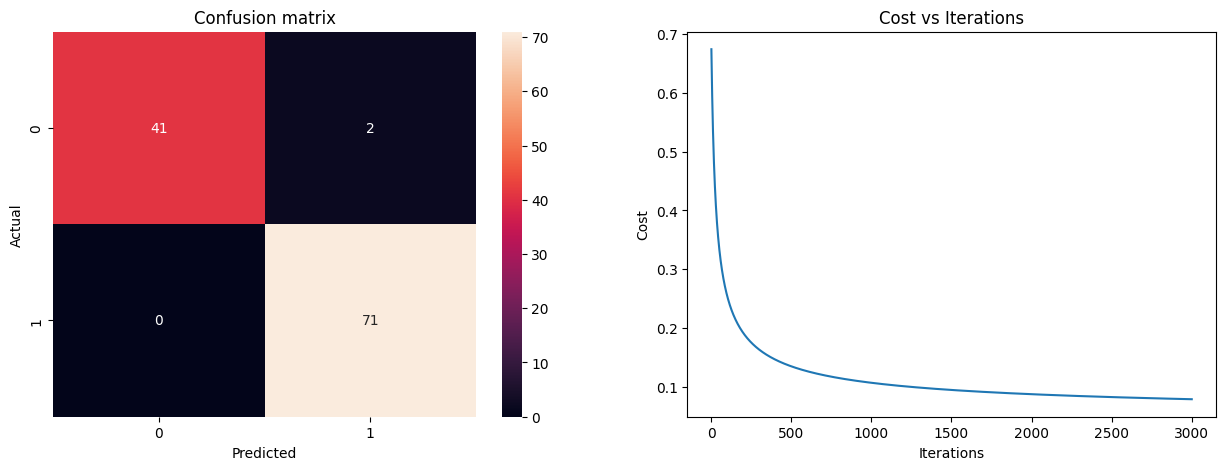

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the breast cancer dataset
data = load_breast_cancer()
X = data['data']
y = data['target'].reshape(-1, 1)


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the logistic regression model and getting the cost history
theta, cost_history = logistic_regression(X_train, y_train, alpha=0.01, num_iterations=3000)

# Make predictions on the test set
predictions = predict(X_test, theta)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_mat = confusion_matrix(y_test, predictions)

print("Accuracy: {:.2f}".format(accuracy * 100))

cost_history = np.array(cost_history).reshape(-1)

fig, ax =plt.subplots(1, 2, figsize=(15, 5))

#plot the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d',ax=ax[0])
ax[0].set_title('Confusion matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')


# Plot the cost history
ax[1].plot(range(1, len(cost_history)+1,1), cost_history)
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Cost')
ax[1].set_title('Cost vs Iterations')
plt.show()
